# Radioastronomia 1 2017/18
## Sprawozdanie - ćw. 1a
## Pomiar fluktuacji szumów i wyznaczenie czułości systemu antena-radiometr
### Dawid Kubicki

## Wstęp

Ćwiczenie przeprowadzono 11 października 2017 w Obserwatorium Astronomicznym UJ przy radioteleskopie RT-15. Celem ćwiczenia było zapoznanie się z działaniem urządzenia. Należało ustawić czaszę radioteleskopu na zenit, a następnie dokonać pomiaru szumów bez i z dodatkowym tłumieniem. Dodatkowo w celu możliwości przeliczenia mocy sygnału z jednostek ADU na jednostki fizyczne dokonano kalibracji.

Dane przetworzono korzystając z opcji "Twórz sken" programu OOD, co akurat w tym przypadku okazuje się nadmiarowe.

W instrukcji do ćwiczenia podano następujące wartości:
- tłumienie sprzęgacza $20dB$
- dodatkowe tłumienie $10dB$
- źródło szumów $T_{szum} = 8670K$
- pasmo przenoszenia $B = 12.6 MHz$

Dodatkowo stała czasowa $\tau = 0.2s$

Podano także wzór na minimalną wykrywalną zmianę temperatury szumowej systemu:
$$\Delta T_{SYS} = \frac{T_{SYS}}{\sqrt{B \tau n}}$$ 
gdzie $n$ - liczba pomiarów, reszta jak wyżej


## Opracowanie

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

def load_data(filename):
    with open(filename) as f:
        res = []
        for line in f:
            res.append(line.split())
        return res
        
data = np.array(load_data('/home/dawid/radioastronomy/data/1A.txt'))
print("Liczba punktow pomiarowych: " + str(len(data)))

Liczba punktow pomiarowych: 1326


Na poniższym wykresie przedstawiona zostanie wartość sygnału w funkcji numeru pomiaru.

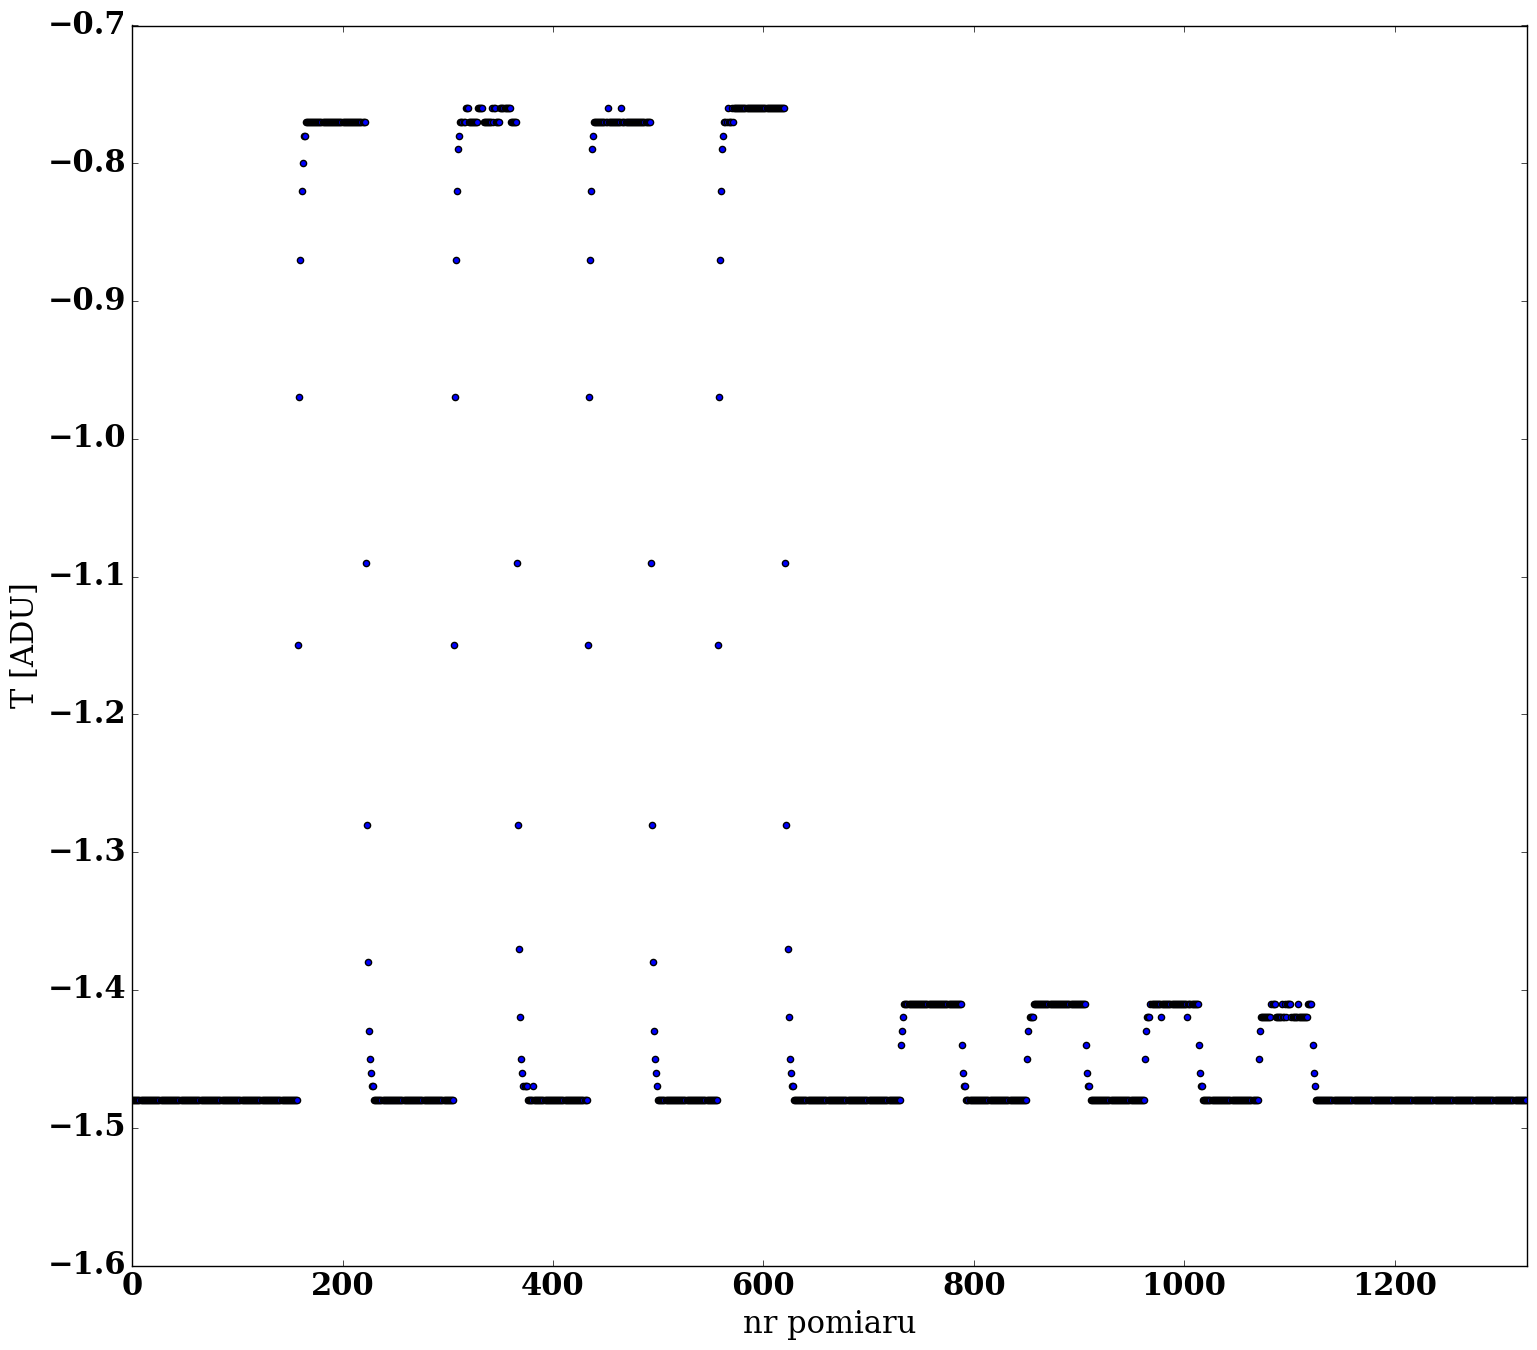

In [3]:
data_count = len(data)
sig = [d[2] for d in data]
nr = np.arange(data_count)

plt.figure(figsize=(18, 16), dpi= 80)
plt.scatter(nr, sig)
plt.xlim([0,data_count])
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

Wyraźnie widać cztery pierwsze kalibracje bez tłumienia i cztery późniejsze z tłumieniem. Ponadto można zauważyć, że ćwiczenie można było wykonać zbierając trochę więcej szumu bez kalibracji. Zaczynamy od wycięcia fragmentów bez kalibracji.

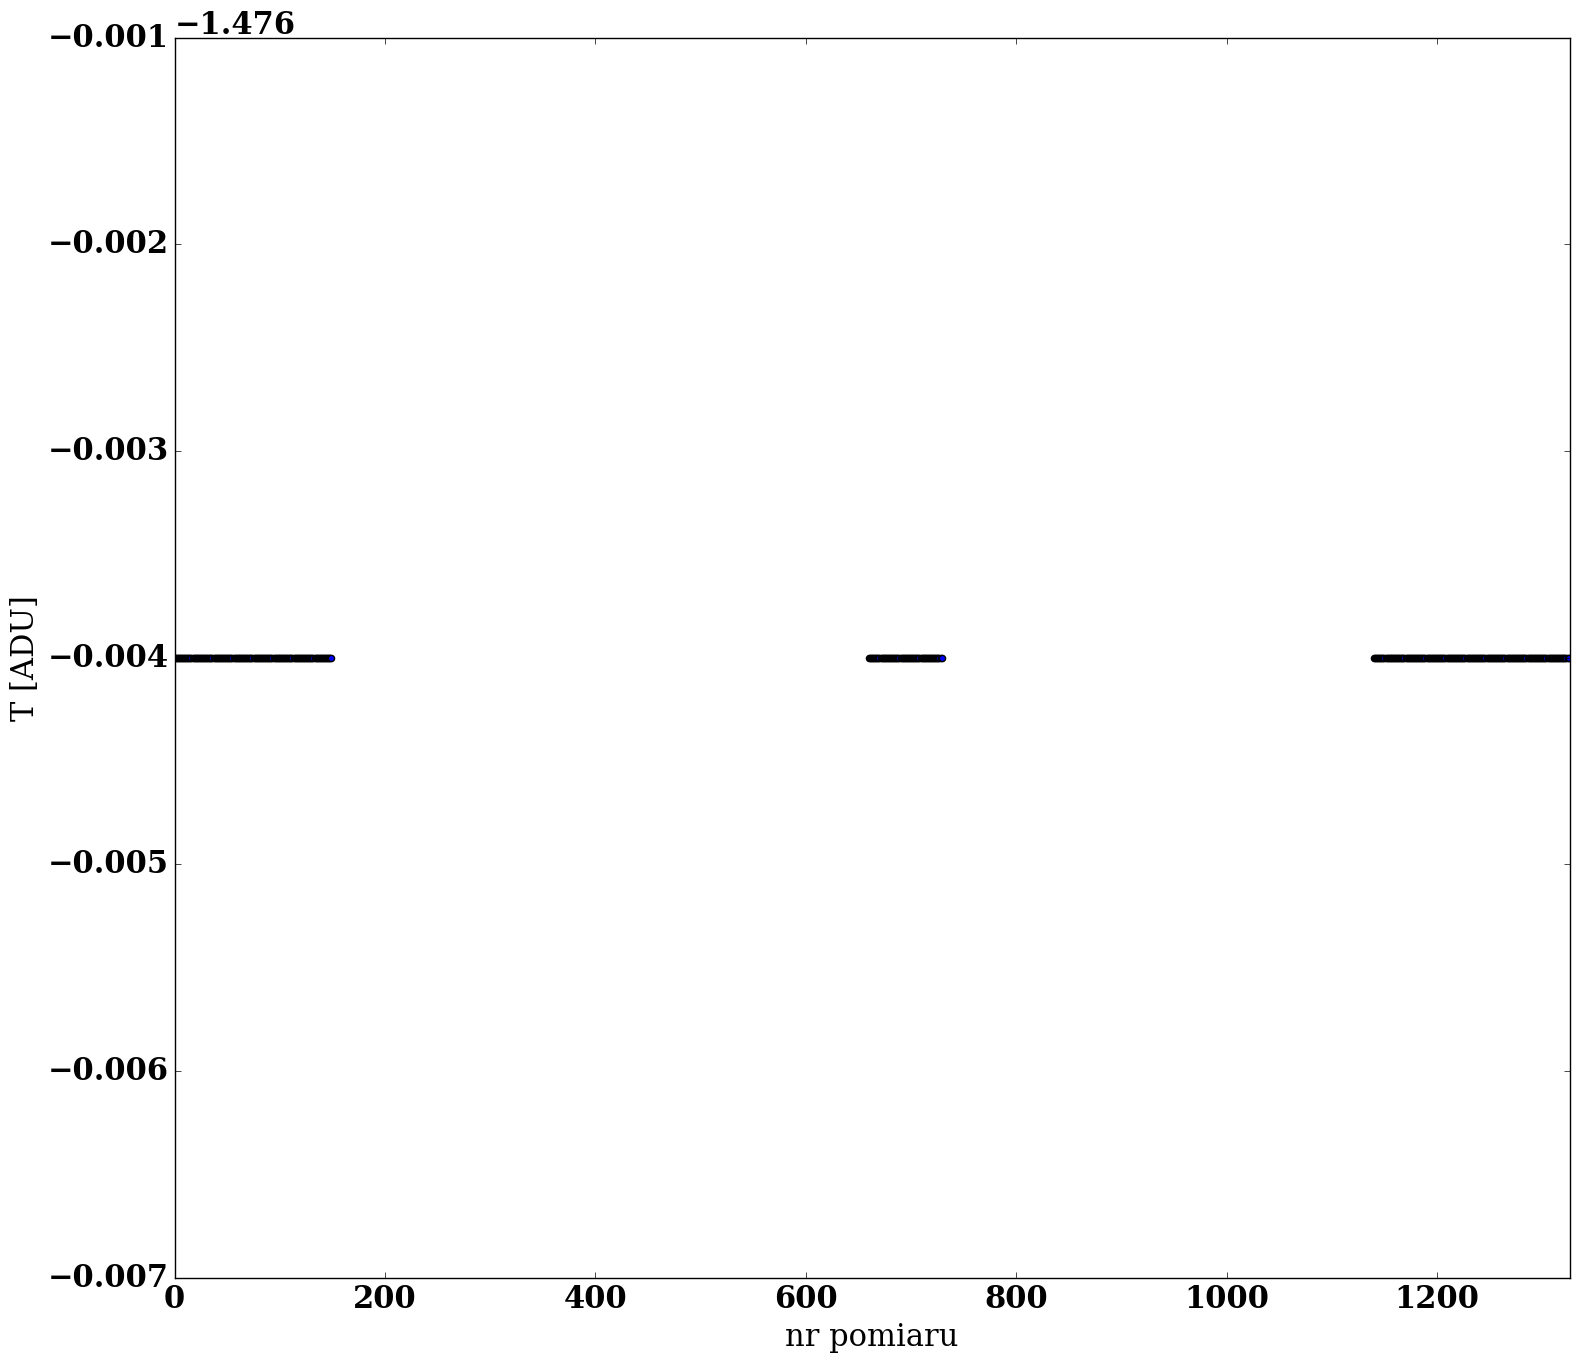

In [4]:
plt.figure(figsize=(18, 16), dpi= 80)
signal1 = np.concatenate([sig[0:150], sig[660:730], sig[1140:]])
nr1 = np.concatenate([nr[0:150], nr[660:730], nr[1140:]])
plt.scatter(nr1, signal1)
plt.xlim([0,data_count])
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

Brak szumów jest niepokojący. Zazwyczaj powinien cieszyć, ale w przypadku zadania, którego celem jest analiza szumu jest to przeszkodą. Wygląda na to, że istotnie warto byłoby zbierać dane przez dłuższy okres czasu.

Po przyjrzeniu się przetworzonym danym okazuje się, że program OOD dokonuje zaokrąglenia z dokładnością dwóch miejsc po przecinku przez co zmiana o zaledwie jedną jednostkę za każdym razem dawała wynik -1.48. Wynika z tego że ze względu na wykorzystanie programu OOD błąd wynikający z zaokrąglenia wynosi $\Delta T_{zaokrąglenie} = 0.005 [ADU]$. Warto mieć to na uwadze wykonując przyszłe ćwiczenia.

Spróbujmy przyjrzeć się surowym danym z radioteleskopu. Surowe dane zawierają nagłówek, który został usunięty by ułatwić czytanie pliku.

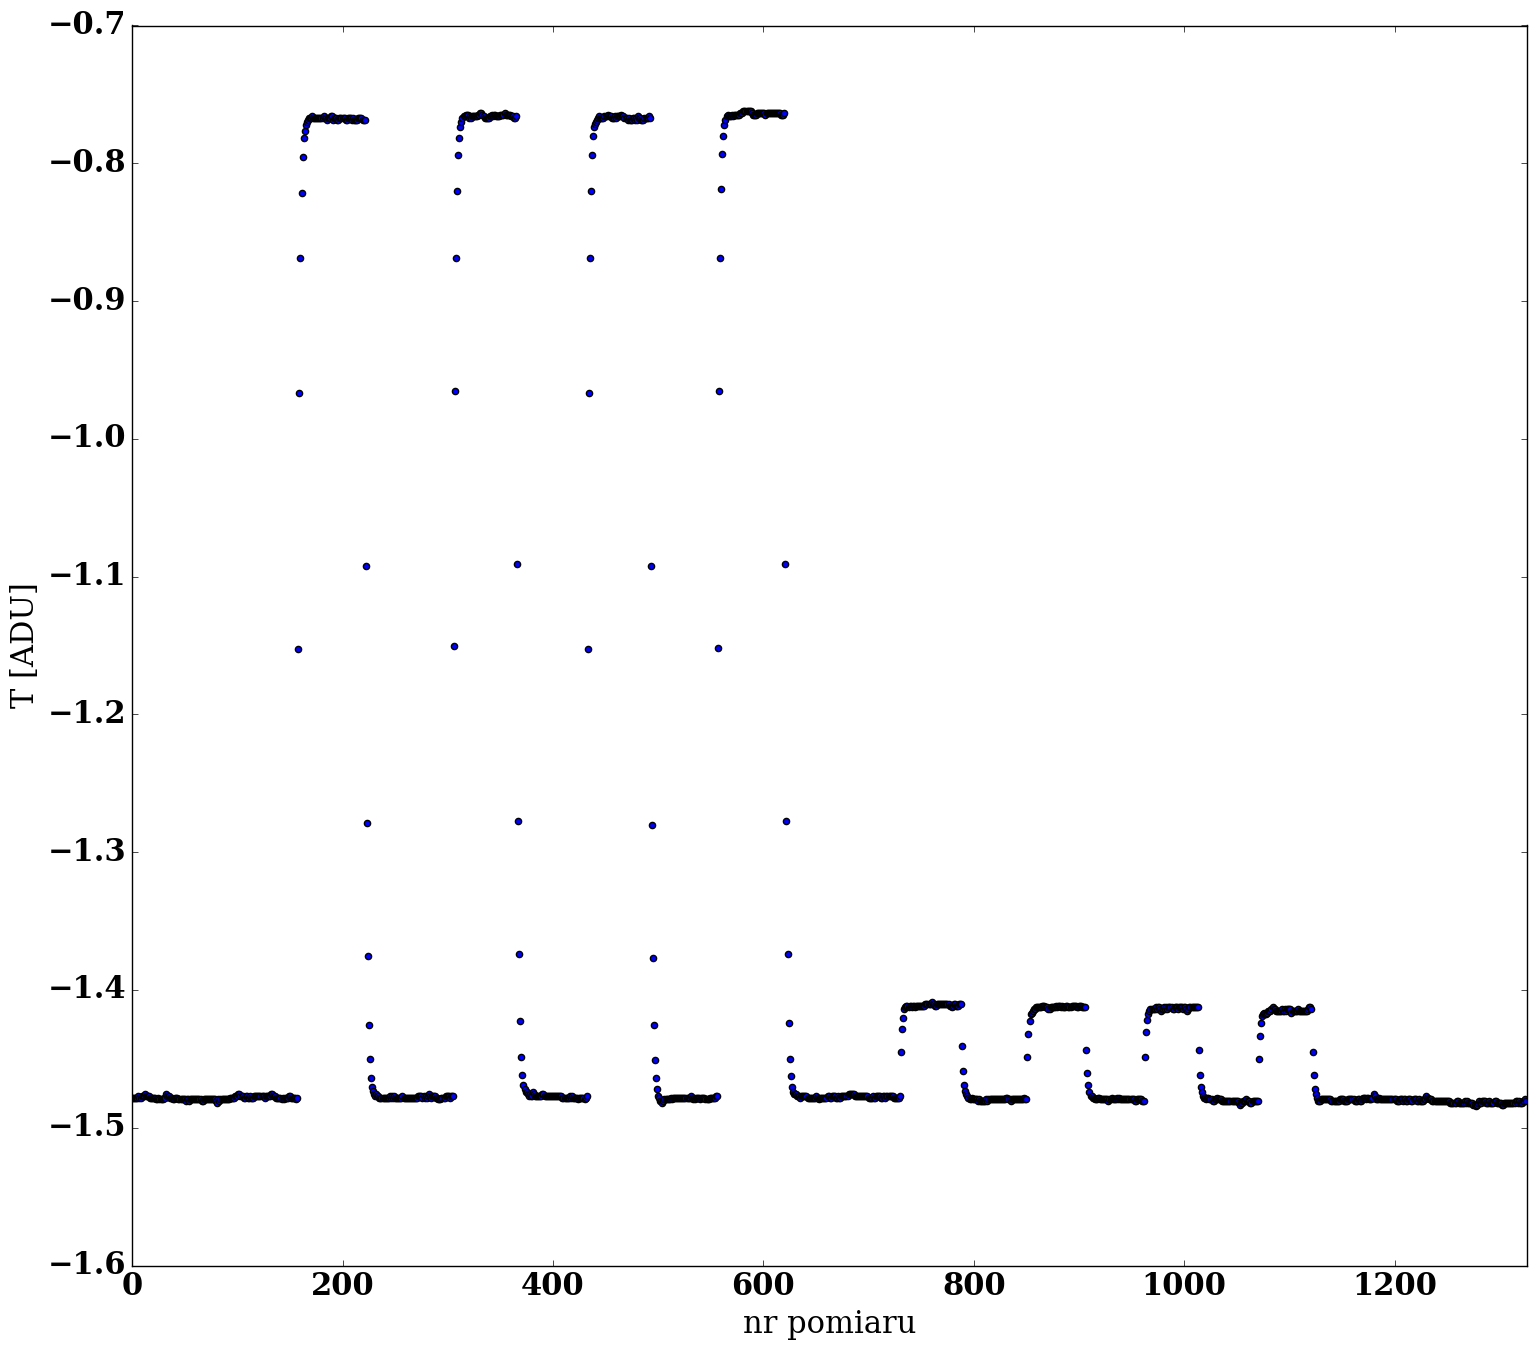

In [5]:
def load_raw_data(filename):
    with open(filename) as f:
        res = []
        for line in f:
            res.append(line.split())
        return res
        
raw_data = np.array(load_raw_data('/home/dawid/radioastronomy/data/1Aedited.DAT'))
raw_sig = np.array([float(d[1]) for d in raw_data])

plt.figure(figsize=(18, 16), dpi= 80)
plt.scatter(nr, raw_sig)
plt.xlim([0,data_count])
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

Jak widzimy w surowych danych szum jest bardziej widoczny i to z nich będziemy korzystać. Ponadto możemy oszacować minimalną różnicę jaką możemy zmierzyć w jednostkach ADU wynikającą z kwantyzacji sygnału.

In [6]:
x = np.abs(np.diff(raw_sig))
b = x > 0.0000001
print(x[b].min())

0.0012


Otrzymujemy wynik 0.0012 (można zgadywać, że wyjście przetwornika przyjmuje 4096 różnych wartości w przedziale o szerokości 5V). Daje to błąd wynikający z kwantyzacji $\Delta T_{kwantyzacja} = 0.0006$. Wracając do szumów wytnijmy z surowych danych część bez kalibracji. 

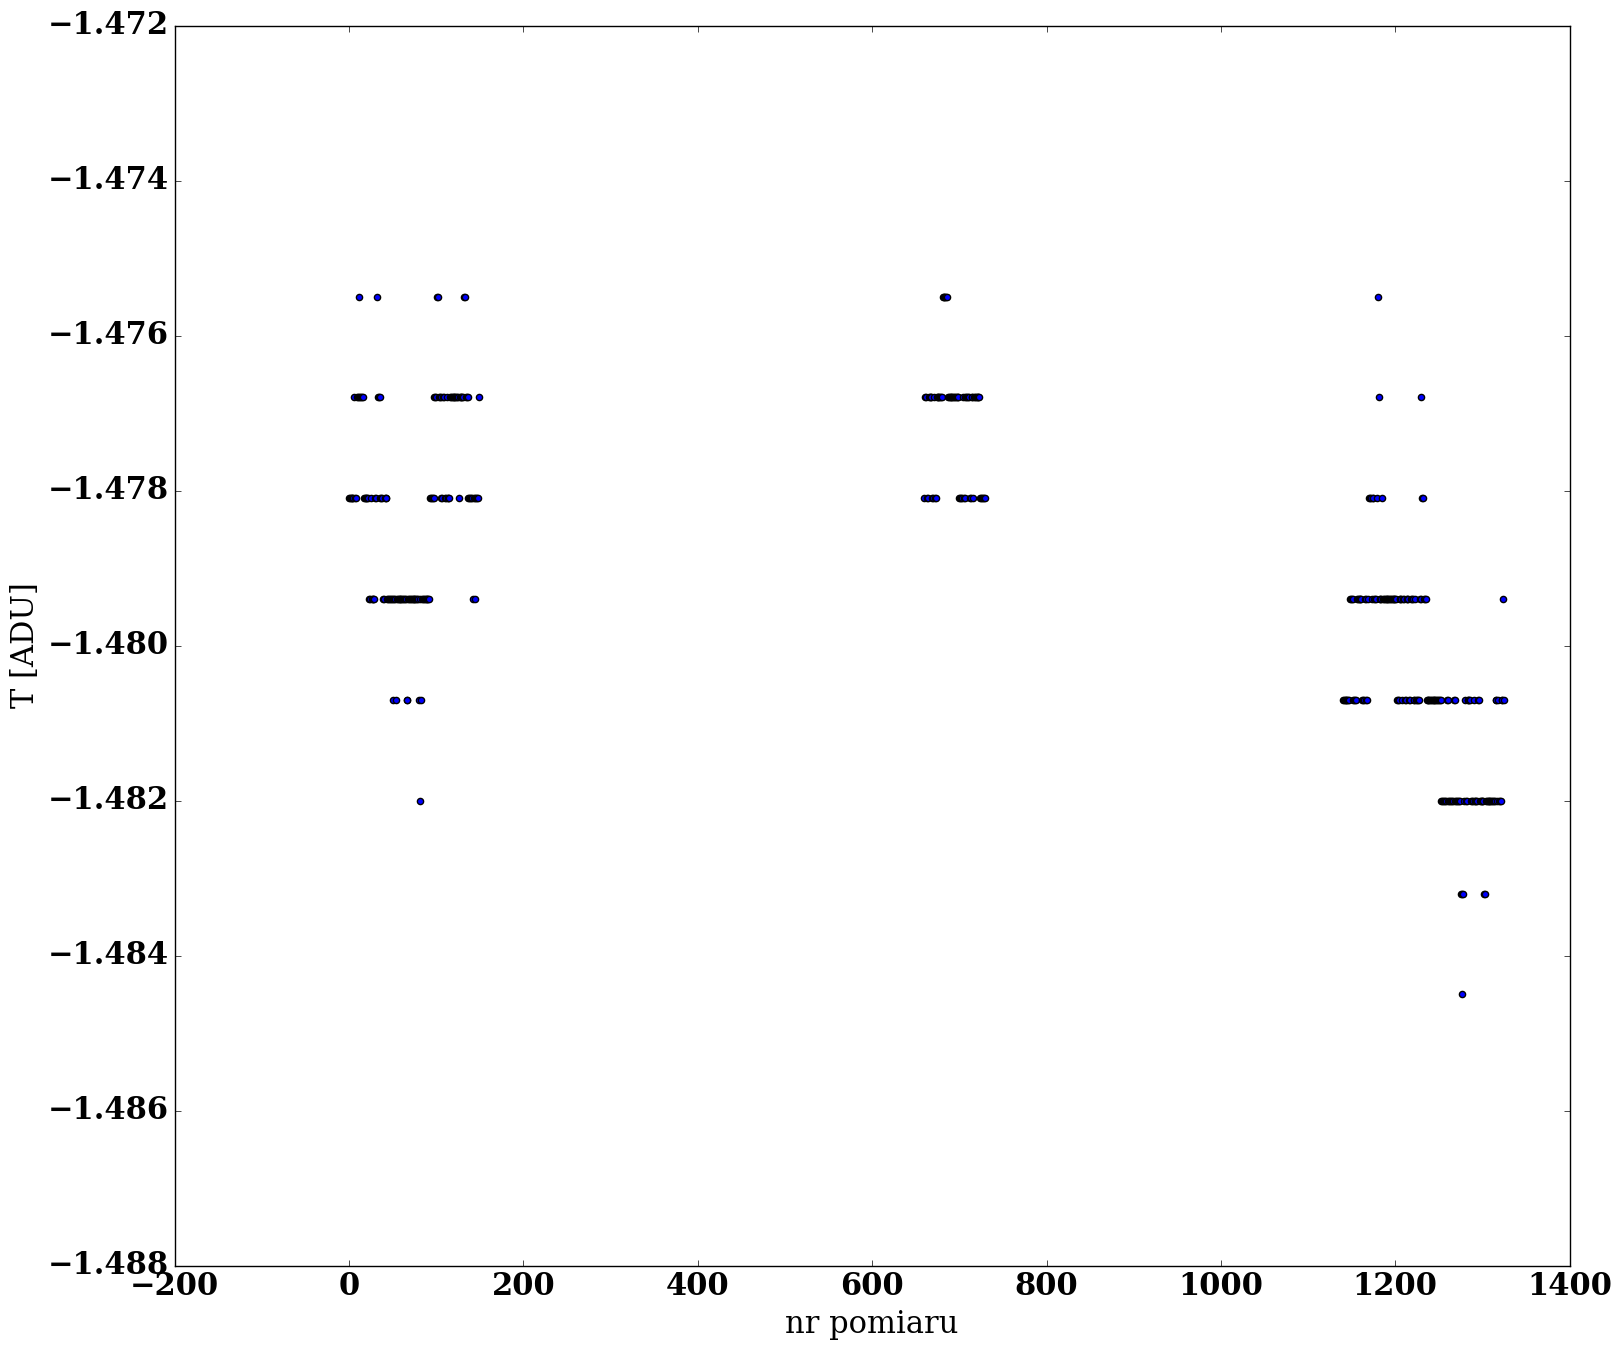

In [7]:
plt.figure(figsize=(18, 16), dpi= 80)
signal2 = np.concatenate([raw_sig[0:150], raw_sig[660:730], raw_sig[1140:]])
nr2 = np.concatenate([nr[0:150], nr[660:730], nr[1140:]])
plt.scatter(nr2, signal2)
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

Widać wyraźnie wartości, które przez program OOD są wszystkie zaokrąglane do -1.48. Warto zauważyć, że dane bliższe początkowi pomiarów oscylują dookoła trochę innej wartości sygnału niż dane zmierzone pod koniec, mimo że radioteleskop był nieruchomy. Jednym z możliwych powodów jest to, że sfera niebieska nie jest nieruchoma i w obserwowanym obszarze przesuwały się słabe radioźródła. Być może są to też jakieś zaburzenia pochodzące z atmosfery bądź radioteleskopu.


Analogicznie wycinamy dane dla obu kalibracji.

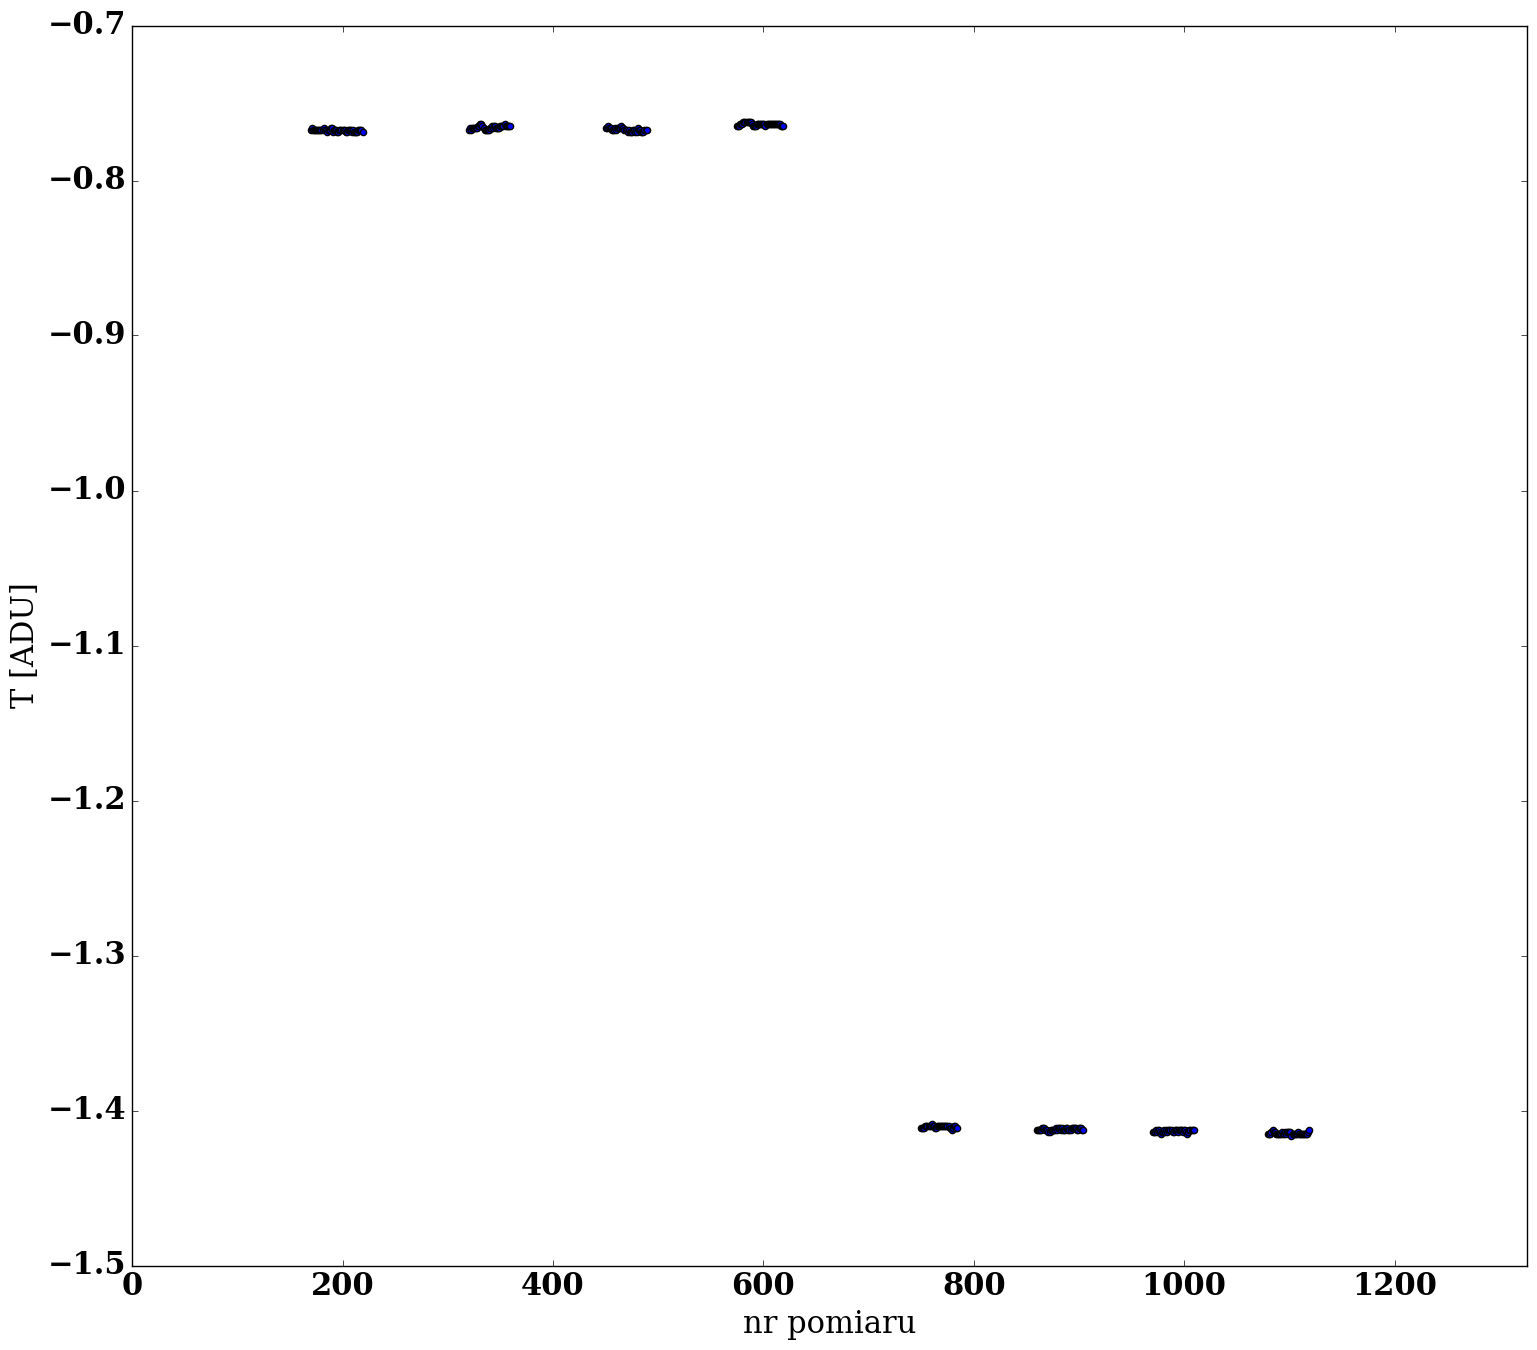

In [8]:
plt.figure(figsize=(18, 16), dpi= 80)
cal1 = np.concatenate([raw_sig[170:220], raw_sig[320:360], raw_sig[450:490], raw_sig[575:620]])
cal2 = np.concatenate([raw_sig[750:785], raw_sig[860:905], raw_sig[970:1010], raw_sig[1080:1120]])
nrcal1 = np.concatenate([nr[170:220], nr[320:360], nr[450:490], nr[575:620]])
nrcal2 = np.concatenate([nr[750:785], nr[860:905], nr[970:1010], nr[1080:1120]])
plt.scatter(nrcal1, cal1)
plt.scatter(nrcal2, cal2)
plt.xlim([0,data_count])
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

W instrukcji jesteśmy proszeni o wyznaczenie średniej wartości i odchylenia standardowego dla uzyskanych wyników obserwacji.

In [9]:
mean1 = np.mean(signal2)
std1 = np.std(signal2)
meancal1 = np.mean(cal1)
stdcal1 = np.std(cal1)
meancal2 = np.mean(cal2)
stdcal2 = np.std(cal2)

from IPython.display import display, HTML

def df_to_html(df, format = "{:.4f}"):
    styles = [
        dict(selector="th", props=[("font-size", "110%"), ("text-align", "center")]),
        dict(selector="td", props=[("text-align", "center")])
    ]
    html = df.style.set_table_styles(styles).format(format).render()
    return html

df1 = pd.DataFrame(data=[[mean1, std1], [meancal1, stdcal1], [meancal2, stdcal2]],
                   columns=['T średnie [ADU]', 'odch. standardowe [ADU]'],
                   index=['T sys', 'T cal1', 'T cal2'])


HTML(df_to_html(df1))

W ćwiczeniu jesteśmy proszeni o wykonanie podobnych obliczeń przy podziale danych na 2 bądź 4 bloki.

In [10]:
def split_to_blocks(data, N):
    data_size = len(data)
    block_size = data_size // N
    subdata = data[:block_size*N]
    return np.split(subdata, N)

def calc_mean_and_std(data, N, prefix):
    index = [prefix + ' - blok ' + str(i+1) for i in range(N)]
    columns = ['T średnie [ADU]', 'odch. standardowe [ADU]']
    blocks = split_to_blocks(data, N)
    means_and_stds = [[np.mean(block), np.std(block)] for block in blocks]
    df = pd.DataFrame(data=means_and_stds, columns=columns, index=index)
    return df
    


df = pd.concat([calc_mean_and_std(signal2, 4, "T sys"),
                calc_mean_and_std(cal1, 4, "T cal1"),
                calc_mean_and_std(cal2, 4, "T cal2")])

HTML(df_to_html(df))

In [11]:
df = pd.concat([calc_mean_and_std(signal2, 2, "T sys"),
                calc_mean_and_std(cal1, 2, "T cal1"),
                calc_mean_and_std(cal2, 2, "T cal2")])

HTML(df_to_html(df))

W ćwiczeniu jesteśmy proszeni o porównanie wyników ze wzorem podanym na początku instrukcji. Został on też podany na początku niniejszego sprawozdania. Jeżeli wyniki są z nim zgodne, to odchylenie standardowe przy podziale na 4 bloki powinno być około $\sqrt{4} = 2$ razy większe niż dla całych pomiarów (oraz $\sqrt{2} \approx 1.41$ przy podziale na 2 bloki). Tak jednak nie jest, a nawet obserwujemy, że dla całych pomiarów odchylenie jest większe niż dla większości bloków. Wynika to najprawdopodobniej ze wspomnianych już długoterminowych wahań (tutaj jako długoterminowe traktujemy dla zakresu więcej niż kilkudziesięciu pomiarów), których rząd jest podobny do wielkości fluktuacji stochastycznych. Wzór $$\Delta T_{SYS} = \frac{T_{SYS}}{\sqrt{B \tau n}}$$ został prawdopodobnie wyprowadzony przy założeniu tylko jednego rodzaju szumu.

Aby móc skorzystać z tego wzoru potrzebowalibyśmy wyników w skali absolutnej, natomiast tutaj mamy do jeszcze czynienia z wynikami z przetwornika analogowo-cyfrowego.

Można przystąpić do przeliczenia wartości ze skali ADU na skalę w kelwinach. Skorzystamy z wiedzy, że $T_{szum} = 8670K$ oraz dla $T_{cal1}$ tłumienie wynosiło $20dB$ czyli $t_{1}=10^{-2}$, a dla $T_{cal2}$ - $30dB$ ($t_2 = 10^{-3}$)

Wiemy że 
$$ a_{1}(T_{cal1} - T_{sys}) =  t_{1} T_{szum} $$
$$ a_{2}(T_{cal2} - T_{sys}) =  t_{2} T_{szum} $$
gdzie $a_{i}$ jest odpowiednim przelicznikiem ze skali ADU na kelwiny.

Stąd $$a_{i} = \frac{t_{i} T_{szum}}{ T_{cal_i} - T_{sys}}$$
Ponadto dla oszacowania błędu metodą różniczki zupełnej mamy
$$u(a_{i}) = t_{i} T_{szum} (\frac{\Delta T_{sys}}{ (T_{cal_i} - T_{sys})^2 } + \frac{\Delta T_{cal_i}}{ (T_{cal_i} - T_{sys})^2 })$$

Dla $T_{sys}$ i $T_{cal}$ błąd statystyczny jest odpowiednio większy od błędu systematycznego wynikającego z kwantyzacji toteż przyjmujemy $\Delta T_{sys} = 0.002 ADU$,  $\Delta T_{cal1} = 0.002 ADU$,  $\Delta T_{cal2} = 0.002 ADU$.

In [12]:
def a_i(t_cal, t_sys, t_i):
    return t_i * 8670 / (t_cal - t_sys)

def delta_a_i(t_cal, t_sys, dt_cal, dt_sys, t_i):
    return t_i * 8670 * ((dt_sys+dt_cal)/(t_cal - t_sys)/(t_cal - t_sys))
    
a1 = a_i(t_cal = -0.766, t_sys = -1.479, t_i = 0.01)
da1 = delta_a_i(t_cal = -0.766, t_sys = -1.479, dt_cal = 0.002, dt_sys = 0.002, t_i = 0.01)
print(a1, da1)

a2 = a_i(t_cal = -1.413, t_sys = -1.479, t_i = 0.001)
da2 = delta_a_i(t_cal = -1.413, t_sys = -1.479, dt_cal = 0.002, dt_sys = 0.002, t_i = 0.001)
print(a2, da2)

121.59887798036465 0.6821816436486094
131.36363636363623 7.9614325068870375


Mamy $$a_1 = 121.6 \pm 0.7 \frac{K}{ADU}$$ $$a_2 = 131.4 \pm 8.0 \frac{K}{ADU}$$

Pierwszy wynik jest istotnie dokładniejszy, co nie powinno dziwić jako że wzór na oszacowanie błędu pomiaru ma w mianowniku kwadrat różnicy zmierzonych temperatur. Z tego powodu do dalszych obliczeń wykorzystamy tylko $a_1$.

Aby móc przeliczyć z ADU na kelwiny potrzebujemy dodatkowo jakiegoś punktu odniesienia. Na razie wiemy, że
$$T_{sys}^{[K]} = a_1 T_{sys}^{[ADU]} + S $$
gdzie $S$ jest nieznanym przesunięciem. Ponieważ w tym ćwiczeniu brakuje nam obserwacji o znanej temperaturze źródła to chcielibyśmy wykorzystać wzór $$\Delta T_{SYS} = \frac{T_{SYS}}{\sqrt{B \tau n}}$$


Nie znam dokładnych założeń dotyczących wyprowadzenia powyższego wzoru, ale najprawdopodobniej uzwględnia on tylko szum statystyczny. W przypadku naszych pomiarów możemy spodziewać się większej liczby czynników powodujących zaburzenia wyników. Przyjrzyjmy się bliżej dwóm kawałkom danych zawierającym po 50 pomiarów.

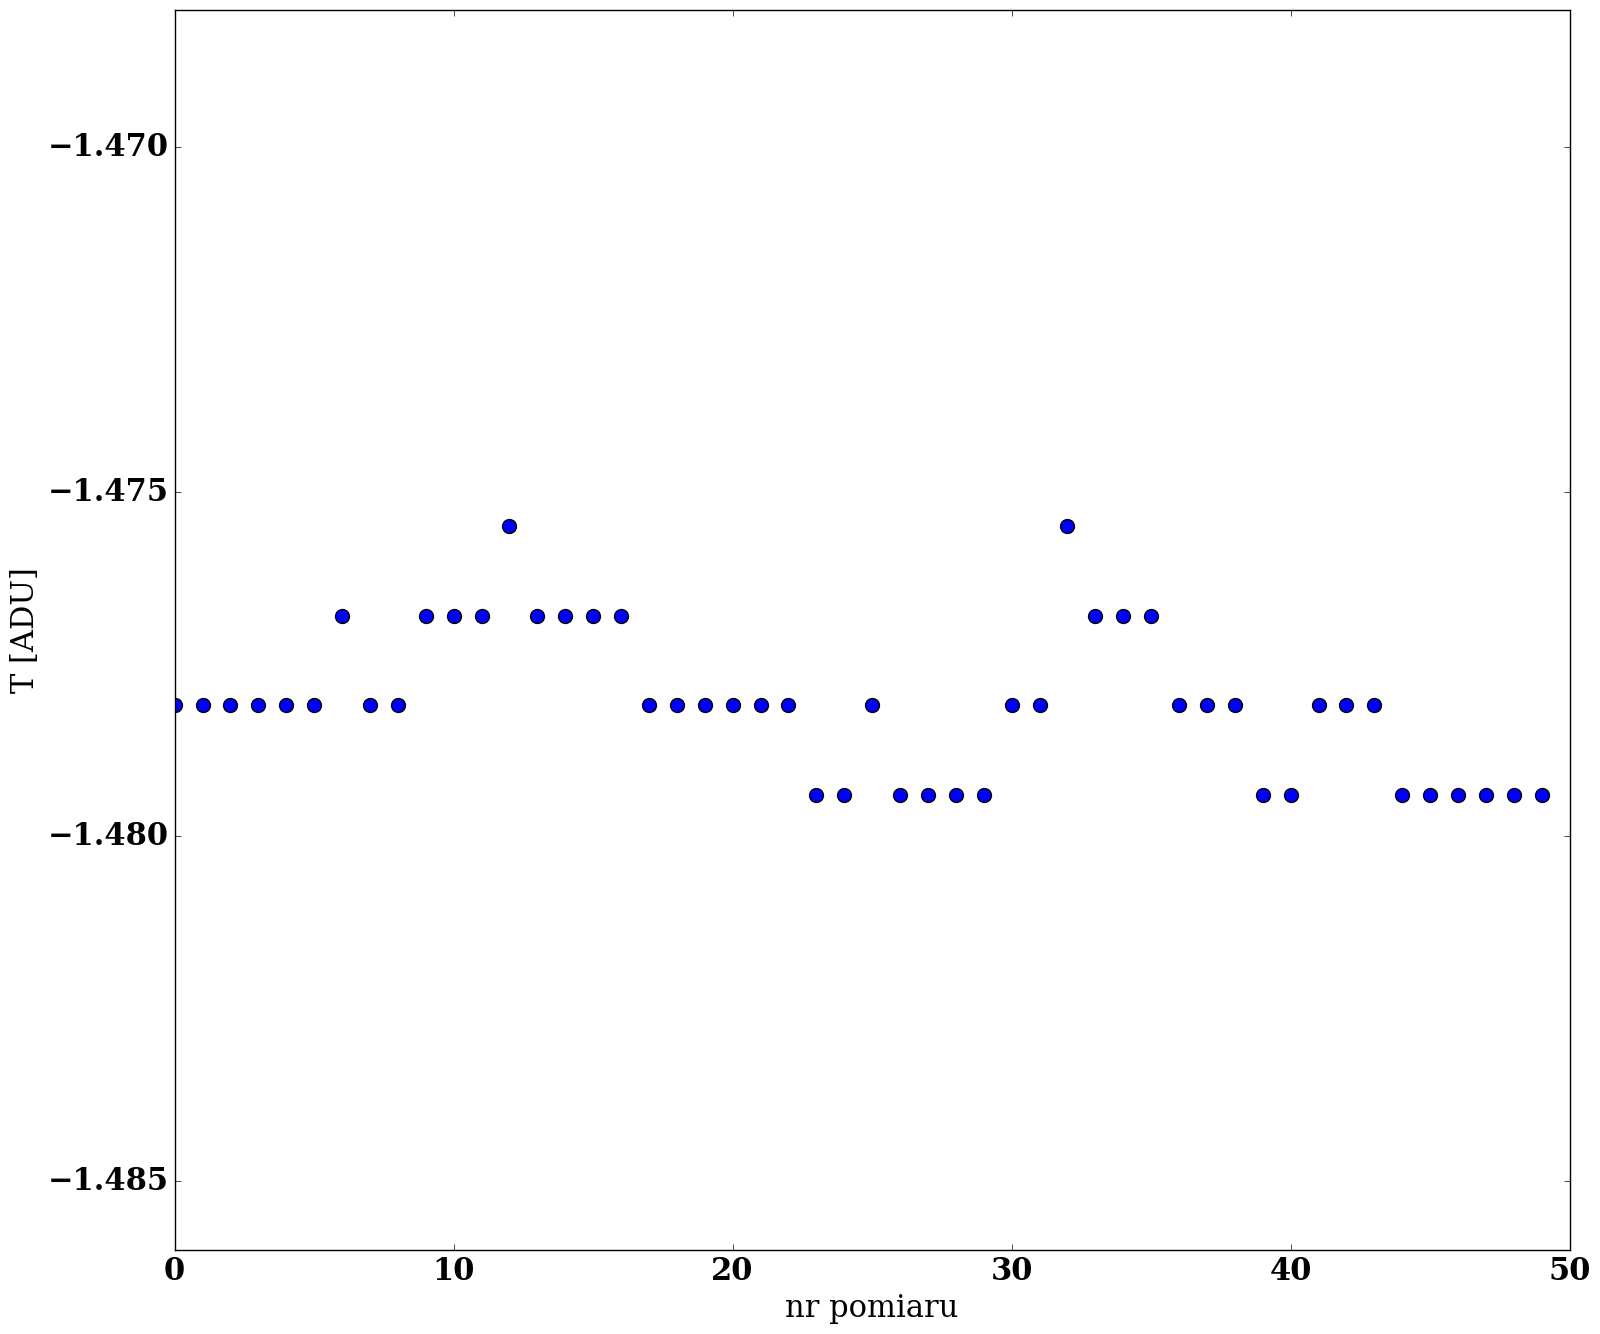

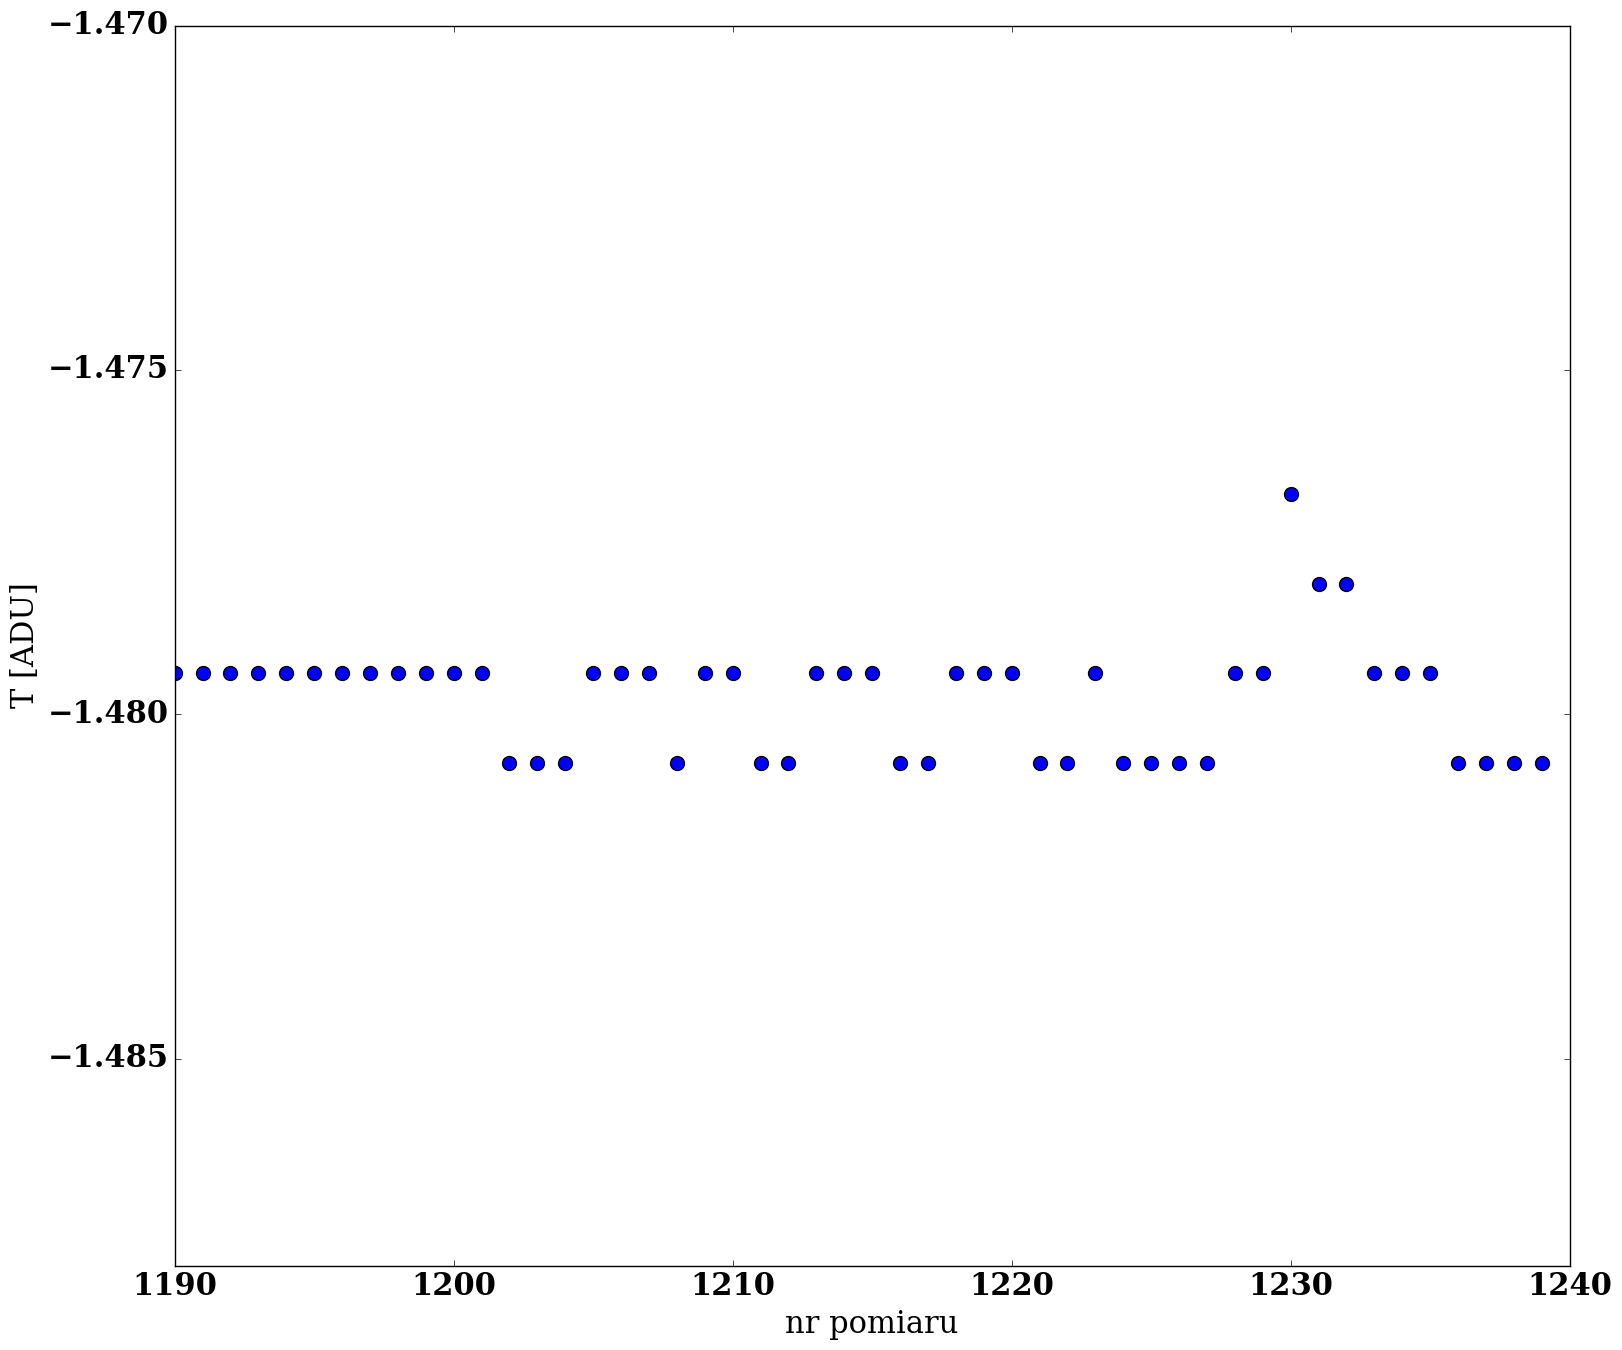

In [13]:
plt.figure(figsize=(18, 16), dpi= 80)
subsig = signal2[:50]
plt.scatter(nr2[:50], subsig, s=100)
plt.xlim((0,50))
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

plt.figure(figsize=(18, 16), dpi= 80)
subsig = signal2[270:320]
plt.scatter(nr2[270:320], subsig, s=100)
plt.xlim((nr2[270], nr2[320]))
plt.xlabel("nr pomiaru")
plt.ylabel("T [ADU]")
plt.show()

W obu powyższych przykładach wartości oscylują wokół pewnego poziomu. Natomiast te poziomy średnie różnią się pomiędzy tymi dwoma zakresami. Załóżmy, że głównym żródłem wahań w trakcie 50 pomiarów jest szum uwzględniony we wzorze i spróbujmy oszacować temperaturę $T_{sys}$ w kelwinach. Należy mieć jednak świadomość, że oszacowanie to zapewne jest bardzo zgrubne. Dla oszacowania błędu zbadamy kilka zakresów po 50 pomiarów.

In [14]:
sigs = [signal2[:50], signal2[50:100], signal2[100:150], signal2[150:200], signal2[270:320]]
means = [np.mean(s) for s in sigs]
stds = [np.std(s) for s in sigs]

mean_std = np.mean(stds)
print('Średnie odchylenie standardowe: ' + str(mean_std) + '[ADU]')
std_for_stds = np.std(stds)
print('Odch. standardowe odch. standardowych: ' + str(std_for_stds) + '[ADU]')

Średnie odchylenie standardowe: 0.000886601357179[ADU]
Odch. standardowe odch. standardowych: 9.36954291768e-05[ADU]


Odchylenie standardowe można przeliczyć z jednostek ADU na kelwiny zakładając $a_1 = 121.6 \pm 0.7 \frac{K}{ADU}$. Jako że nasze obliczenia mają charakter szacunkowy i błąd względny $a_1$ jest niewielki w tym kontekście, pomieniemy błąd wyznaczenia $a_1$ w poniższych wyliczeniach.

In [16]:
from math import sqrt

t_sys = mean_std * sqrt(12.6e6 * 50 * 0.2) * 121.6
dt_sys = std_for_stds * sqrt(12.6e6 * 50 * 0.2) * 121.6
print(t_sys, dt_sys)

1210.17238708 127.890195822


Otrzymujemy wynik 
$$T_{sys} = 1210 \pm 127 K$$
jak już odnotowano powyżej wynik ten ma charakter dosyć szacunkowy, a błąd jest zapewne niedoszacowany. Otrzymany wynik jest podejrzanie wysoki. Jako że przy podziale szumu na 4 bloki nie zauważamy zgodności ze wzorem przeliczanie w ten sposób większej liczby wyników byłoby sztuką dla sztuki, zwykłym przekształceniem matematycznym bez sensu fizycznego. Z tego powodu ta część instrukcji zostanie pominięta.

## Podsumowanie

Ćwiczenie pozwalało zapoznać się z podstawową obsługą radioteleskopu RT-15. Zadanie wykonano w większości poprawnie, szkoda że nie zaobserwowano większej ilości szumów. Na podstawie otrzymanych danych nie było możliwe wykonanie wszystkich podpunktów instrukcji. Brak punktu odniesienia utrudnia oszacowanie wartości temperatur. Instrukcja do ćwiczenia wydaje się być zbyt optymistyczna, jej trzeci punkt jest awykonalny bez dodatkowej wiedzy o przesunięciu skali. Ponadto w ćwiczeniu szum jest podobnego rzędu co błąd kwantyzacji, co utrudnia analizę danych.